In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguin-size-dataset/penguins_size.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/penguin-size-dataset/penguins_size.csv") 

In [3]:
dataset.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
dataset.columns = ['species' , 'island' , 'culmen_length' , 'culmen_depth' , 'flipper_length' , 'body_mass' ,'sex']


In [5]:
dataset.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
dataset.isnull().sum()

species            0
island             0
culmen_length      2
culmen_depth       2
flipper_length     2
body_mass          2
sex               10
dtype: int64

In [7]:
dataset.dropna(axis=0,inplace=True)

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset['body_mass'].dtype

dtype('float64')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

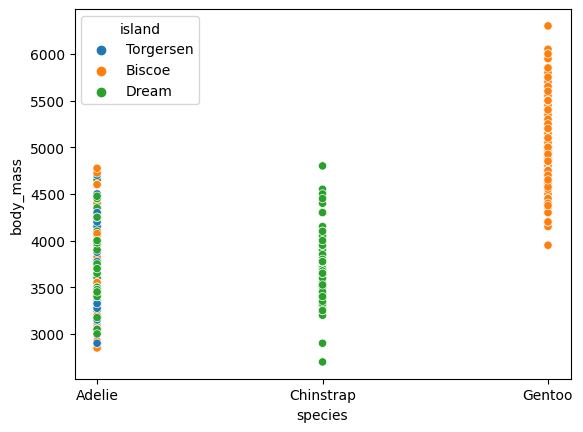

In [11]:
sns.scatterplot(data = dataset , x='species' , y='body_mass' , hue = 'island')
plt.show()

In [12]:
dataset.groupby('species')['island'].unique()

species
Adelie       [Torgersen, Biscoe, Dream]
Chinstrap                       [Dream]
Gentoo                         [Biscoe]
Name: island, dtype: object

In [13]:
dataset.describe()

,culmen_length,culmen_depth,flipper_length,body_mass
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
hist_col = [cols for cols in dataset.columns if dataset[cols].dtype != 'O']
hist_col

['culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


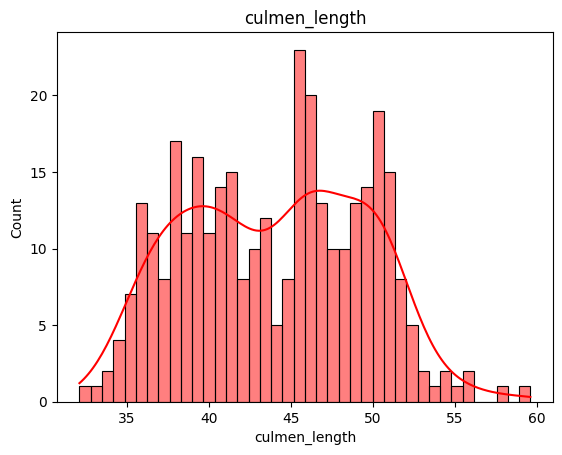

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


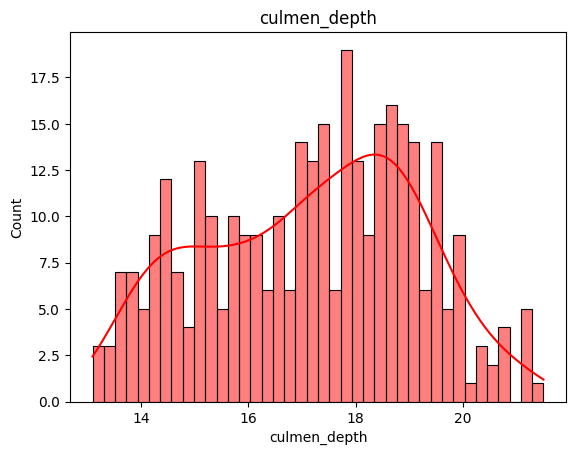

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


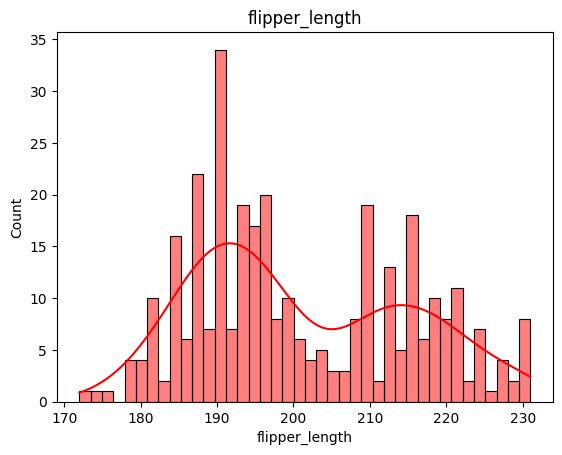

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


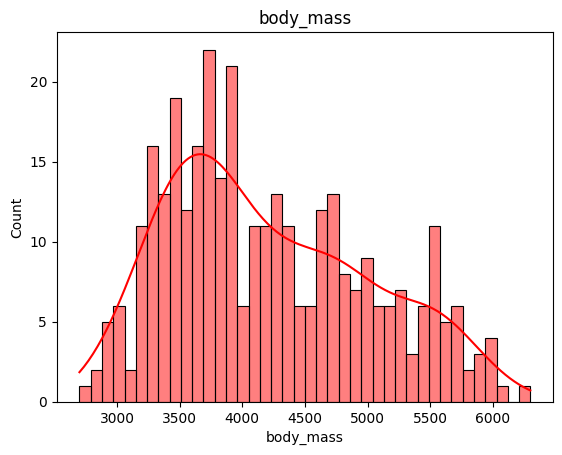

In [15]:
for i in hist_col :
    sns.histplot(data = dataset , x = i ,bins = 40 , kde=True , color = 'red')
    plt.title(f'{i}')
    plt.show()

In [16]:
dataset['new'] = dataset['culmen_length']* dataset['flipper_length']


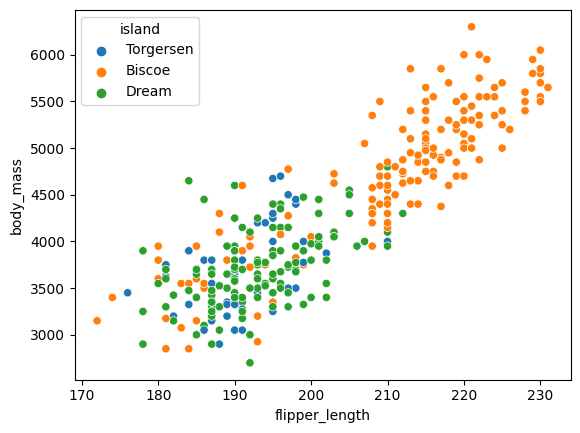

In [17]:
sns.scatterplot(data = dataset , x= 'flipper_length' ,y = 'body_mass' , hue='island')
plt.show()

In [18]:
x = dataset[['flipper_length' , 'species' , 'culmen_length','culmen_depth','island' ]]
y = dataset['body_mass']

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cols = [cols for cols in x.columns if x[cols].dtype == 'O']
for i in cols :
    x[i] = encoder.fit_transform(x[i])

<ipython-input-19-33effbad60d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = encoder.fit_transform(x[i])
<ipython-input-19-33effbad60d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = encoder.fit_transform(x[i])


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = [cols for cols in x.columns if x[cols].dtype != 'O']
x[cols] = scaler.fit_transform(x[cols])

<ipython-input-20-872737c1d497>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cols] = scaler.fit_transform(x[cols])


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2 )
x = poly.fit_transform(x)


In [22]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

## Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test , y_pred)

0.859453089268834

## Hyperparameter Tuning (Random Forest)

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
model = GridSearchCV(RandomForestRegressor(random_state = 0) , param_grid , cv = 2 , scoring='r2' , n_jobs = -1)
model.fit(x_train , y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [27]:
y_pred= model.predict(x_test)

In [28]:
r2_score(y_test , y_pred)

0.8687054029029303

## LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(y_test , y_pred , squared = False)
r2_score(y_test,y_pred)

0.8757367879968041

## Hyperparmeter Tuning (Linear Regression)

In [32]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
model = GridSearchCV(LinearRegression() , param_grid , cv = 2 , scoring='r2' , n_jobs = -1)
model.fit(x_train , y_train)

GridSearchCV(cv=2, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(y_test , y_pred , squared = False)
r2_score(y_test,y_pred)

0.8757367879968041

In [35]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.8673729179581274

## SGDRegressor

In [36]:
# SGDregression
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(x_train , y_train)

SGDRegressor()

In [37]:
y_pred = model.predict(x_test)

In [38]:
mean_squared_error(y_test , y_pred)


96588.79287803108

In [39]:
r2_score(y_test , y_pred)

0.8708573960863707

## Hyperparameter Tuning (SGDRegressor)

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'loss': ['squared_error', 'huber'],
    'penalty': ['l2', 'elasticnet'],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000],
    'learning_rate': ['optimal', 'invscaling'],
    'eta0': [0.01]
}
grid = GridSearchCV(SGDRegressor() , param_grid , cv = 5 , scoring='r2' , n_jobs = -1)
grid.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001], 'eta0': [0.01],
                         'learning_rate': ['optimal', 'invscaling'],
                         'loss': ['squared_error', 'huber'], 'max_iter': [1000],
                         'penalty': ['l2', 'elasticnet']},
             scoring='r2')

In [41]:
grid.best_params_

{'alpha': 0.001,
 'eta0': 0.01,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'penalty': 'l2'}

In [42]:
y_pred = grid.predict(x_test)

In [43]:
mean_squared_error(y_test , y_pred)

99876.4672636413

In [44]:
r2_score(y_test , y_pred)

0.8664616601181824